Test 4 hàm mục tiêu bằng thuật toán FSA kết hợp với GA

In [2]:
# Define the objective functions
def F1(x):
    return np.sum(x**2)

def F2(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def F3(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def F4(x):
    return 1/4000 * np.sum(x**2) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def F5(x):  # Alpine Function
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))

def F6(x):
    return np.sum(np.sqrt(np.abs(x)) + np.sin(x))

def F7(x):  # Michalewicz Function
    m = 10
    return -np.sum(np.sin(x) * np.sin(((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m)))

def F8(x):
    return np.sum(np.sin(x) + np.cos(x))

def F9(x):
    return np.sum(np.abs(x) * np.sin(x))

def F10(x):
    return np.sum(np.abs(x) * np.cos(x))

Function: F1
Execution Time: 3.9620673656463623 seconds
Flamingo Search Best Solution: [-0.41463662  0.05325928 -0.46414834 -0.12001862  0.38044231  0.19184664
  0.37191897  0.35958707 -0.44908057 -0.10681733  0.12344356  0.44641751
 -0.057167    0.22977456  0.07550897 -0.04476862  0.00172221 -0.34523121
  0.33544777 -0.31671005 -0.27650887 -0.29444331  0.02603645 -0.1899414
 -0.23693977  0.32749614  0.08601756  0.45230333 -0.4618273  -0.77932374] Objective Value: 3.073075860423031
Genetic Algorithm Best Solution: [ 0.05100998  0.09627433 -0.0080457  -0.00907396  0.04896871  0.0292884
  0.05055935 -0.03191348  0.07266798 -0.28739029  0.097993    0.19544329
 -0.10940765  0.0647311   0.04445093  0.07575233 -0.03805916 -0.06098983
  0.05543361  0.03185845 -0.02969285  0.02519858 -0.13137171  0.06058716
  0.26750643 -0.06904953 -0.06691475  0.07665222 -0.271073    0.12577434] Objective Value: 0.38607977172795815
Flamingo Search and Genetic Algorithm Mixed Best Solution: [-0.04351729 -0.050

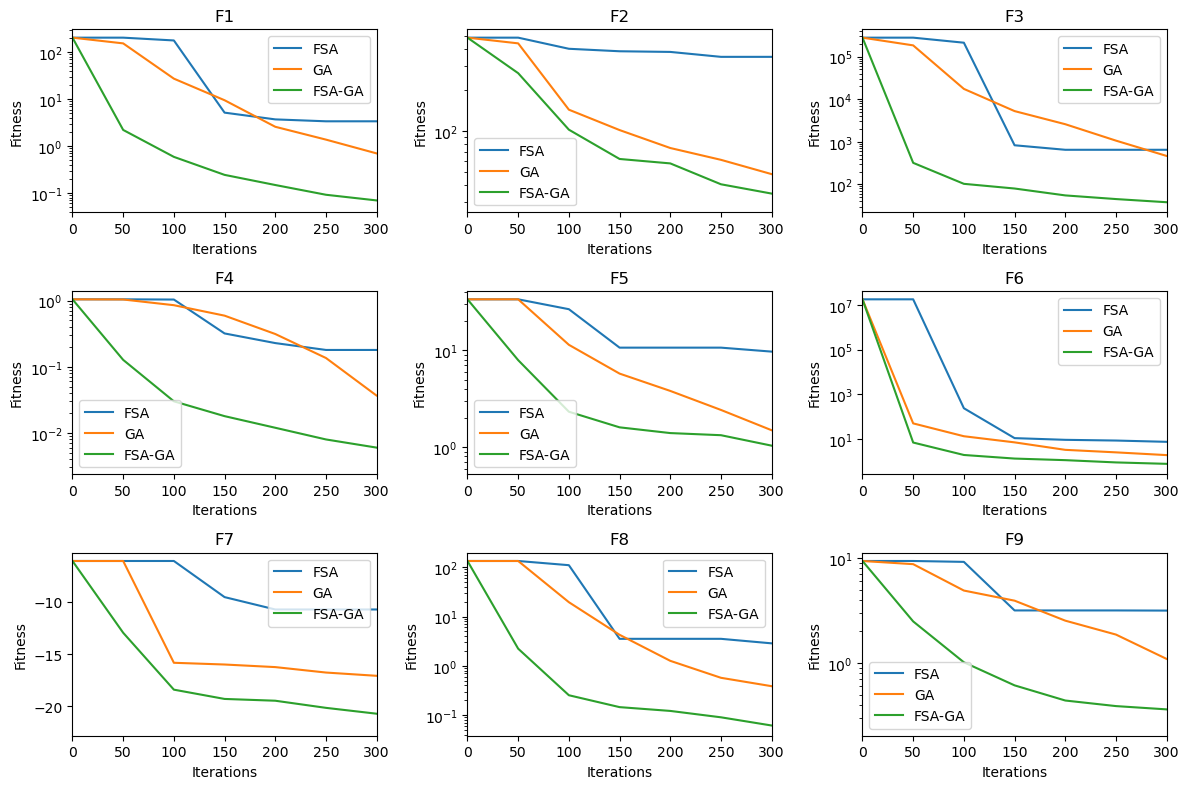

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Objective functions
def F1(x):
    return np.sum(x**2)

def F2(x): #change with other functions

    A = 10  # Modify this constant as needed
    return A * len(x) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in x])

def F3(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def F4(x):
    return 1/4000 * np.sum(x**2) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def F5(x):  # Alpine Function
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))


def F6(x):
    sum=0
    sum1=1
    for i in range(len(x)):
        sum+=np.abs(x[i])
        sum1*=np.abs(x[i])
    return sum+sum1

def F7(x):  # Michalewicz Function
    m = 10
    return -np.sum(np.sin(x) * np.sin(((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m)))


def F8(x):
    sum=0
    for i in range(len(x)):
        sum+=(x[i]+0.5)*(x[i]+0.5)
    return sum

def F9(x):
    n = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / n)) - np.exp(np.sum(np.cos(2 * np.pi * x)) / n) + 20 + np.exp(1)

# Flamingo Search Algorithm
def flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma):
    best_solution = initial_solution
    best_objective_value = objective_function(best_solution)
    convergence = [best_objective_value]

    for i in range(n_iter):
        flamingos = [best_solution + np.random.normal(scale=sigma, size=len(best_solution)) for _ in range(n_flamingos)]
        for f in flamingos:
            f_value = objective_function(f)
            if f_value < best_objective_value:
                best_solution = f
                best_objective_value = f_value
        if i % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence

# Genetic Algorithm Functions
def create_population(size, dim, lb=-5, ub=5):
    return np.random.uniform(lb, ub, (size, dim))

def fitness_function(population, objective_function):
    fitness = np.array([objective_function(ind) for ind in population])
    fitness_prob = 1 / (fitness + 1e-10)  # Inverse of objective value
    fitness_prob -= np.min(fitness_prob)  # Make sure all probabilities are non-negative
    fitness_prob /= np.sum(fitness_prob)  # Normalize to make sum of probabilities equal to 1
    return fitness_prob

def selection(population, fitness, num_parents):
    parents_idx = np.random.choice(len(population), size=num_parents, replace=False, p=fitness)
    return population[parents_idx]

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        crossover_point = np.random.randint(1, offspring_size[1] - 1)
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, mutation_rate=0.1):
    for idx in range(offspring_crossover.shape[0]):
        if np.random.rand() < mutation_rate:
            random_index = np.random.randint(0, offspring_crossover.shape[1])
            offspring_crossover[idx, random_index] += np.random.normal()
    return offspring_crossover

# def genetic_algorithm(population, objective_function, generations, mutation_rate=0.1, elitism_rate=0.1):
#     convergence = []
#     best_objective_value = np.inf

#     for gen in range(generations):
#         fitness = fitness_function(population, objective_function)
#         parents = selection(population, fitness, len(population) // 2)
#         offspring_crossover = crossover(parents, (len(population) - len(parents), population.shape[1]))
#         offspring_mutation = mutation(offspring_crossover, mutation_rate)
#         population[:len(parents)] = parents
#         population[len(parents):] = offspring_mutation

#         # Elitism
#         num_elites = int(elitism_rate * len(population))
#         elites = population[np.argsort([objective_function(ind) for ind in population])[:num_elites]]
#         population[:num_elites] = elites

#         best_solution = population[np.argmin([objective_function(ind) for ind in population])]
#         current_best_value = objective_function(best_solution)
#         if current_best_value < best_objective_value:
#             best_objective_value = current_best_value
#         if gen % 50 == 0:
#             convergence.append(best_objective_value)

#     convergence.append(best_objective_value)  # Final value at iteration 100
#     return best_solution, convergence

# Function to format results
def format_results(fs_convergence, ga_convergence, fsga_convergence):
    results = []
    for i in [100, 200, 300]:
        fs_fitness = fs_convergence[i // 50]
        ga_fitness = ga_convergence[i // 50]
        fsga_fitness = fsga_convergence[i // 50]
        results.append(f"{i}\t{ga_fitness}\t{fs_fitness}\t{fsga_fitness}")
    return results
def genetic_algorithm(population, objective_function, generations, mutation_rate=0.1, elitism_rate=0.1):
    convergence = []
    best_objective_value = np.inf

    for gen in range(generations):
        fitness = fitness_function(population, objective_function)
        parents = selection(population, fitness, len(population) // 2)
        offspring_crossover = crossover(parents, (len(population) - len(parents), population.shape[1]))
        offspring_mutation = mutation(offspring_crossover, mutation_rate)
        population[len(parents):] = offspring_mutation

        # Elitism: Keep top elitism_rate * 100% individuals
        num_elites = int(elitism_rate * len(population))
        elites = population[np.argsort([objective_function(ind) for ind in population])[:num_elites]]
        population[:num_elites] = elites

        best_solution = population[np.argmin([objective_function(ind) for ind in population])]
        current_best_value = objective_function(best_solution)
        if current_best_value < best_objective_value:
            best_objective_value = current_best_value
        if gen % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence


# Flamingo Search and Genetic Algorithm Combined
def flamingo_genetic_search(objective_function, initial_solution, n_iter, n_flamingos, sigma, generations, population_size):
    # Flamingo Search
    fs_best_solutions = [flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma)[0] for _ in range(10)]
    # Create population from best solutions found by FSA
    population = create_population(population_size, len(initial_solution))
    population[:10] = fs_best_solutions
    # Apply GA on initial population from FSA
    best_solution, convergence = genetic_algorithm(population, objective_function, generations)
    return best_solution, convergence

# Main Loop to Test All Functions
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9]
function_names = ["F1", "F2", "F3", "F4", "F5", "F6", "F7" , "F8", "F9"]

n_iter = 300  # Number of iterations for FSA
n_flamingos = 100  # Number of Flamingos
sigma = 0.5  # Step size in FSA
generations = 300  # Number of generations for GA
population_size = 100  # Population size for GA
dim = 30  # Dimension of the problem
lb = -5
ub = 5

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    # Step 0: Initial random solutions and select the best
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    # Flamingo Search
    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    # Genetic Algorithm
    population = create_population(population_size, dim)
    population[0] = initial_solution  # Ensure starting from the same initial solution
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    # Flamingo Search and Genetic Algorithm Mixed
    fsga_best_solution, fsga_convergence = flamingo_genetic_search(func, initial_solution, n_iter, n_flamingos, sigma, generations, population_size)
    fsga_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    time_end = time.time()

    # Print Results
    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))
    print("Flamingo Search and Genetic Algorithm Mixed Best Solution:", fsga_best_solution, "Objective Value:", func(fsga_best_solution))

    # Format and print results for iterations 100, 200, 300
    formatted_results = format_results(fs_convergence, ga_convergence, fsga_convergence)
    print("Interation\t100\t200\t300")
    for result in formatted_results:
        print(func_name + "_" + result)
    # Plot Convergence Comparison
    x_points = np.arange(0, len(fs_convergence) * 50, 50)  # Adjust x_points to match the interval

    # Check lengths of convergence arrays and adjust if necessary
    convergence_arrays = [fs_convergence, ga_convergence, fsga_convergence]
    min_length = min(map(len, convergence_arrays))
    convergence_arrays = [arr[:min_length] for arr in convergence_arrays]
    x_points = x_points[:min_length]

    axs[i].plot(x_points, convergence_arrays[0], label='FSA')
    axs[i].plot(x_points, convergence_arrays[1], label='GA')
    axs[i].plot(x_points, convergence_arrays[2], label='FSA-GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')    
    if func_name != "F7":
        axs[i].set_yscale('log')  # Set logarithmic scale for y-axis except F7
    axs[i].legend()
    axs[i].set_xlim(0, 300)


plt.tight_layout()
plt.show()


Function: F1
Execution Time: 15.411914825439453 seconds
Flamingo Search Best Solution: [-1.07069911  1.03247846  0.39890934 -0.22303251  0.09761607  0.18961204
 -0.10388799  0.41229766  0.59250153  0.32793696  0.33118749  0.74550506
  0.2340825   0.24069316 -0.04056413 -0.26012334  0.72780424 -0.11881446
  0.0403069   0.58291055  0.54781971  0.23802035 -0.14296406 -0.61944075
  0.3184317   0.76641989  1.22805456  0.80875739  1.15483629  1.52646033] Objective Value: 521.3594218263318
Genetic Algorithm Best Solution: [ 0.50480456  0.45915041  0.55433756  0.70459878  0.6783193   0.4516024
  0.11392985  0.25117647  0.86783346  0.96103072  0.52474909  0.14840986
 -0.60107795  0.82506687  1.13840922  1.19572364  1.32651865  1.25003049
  1.17955163  0.97107336  0.85117981  1.07366108  1.13810192  1.07460146
  1.0796254   1.13611587  1.24839607  1.38708682  1.67659068  2.90098614] Objective Value: 305.5870583283204
Flamingo Search and Genetic Algorithm Mixed Best Solution: [ 0.46203216  0.2358

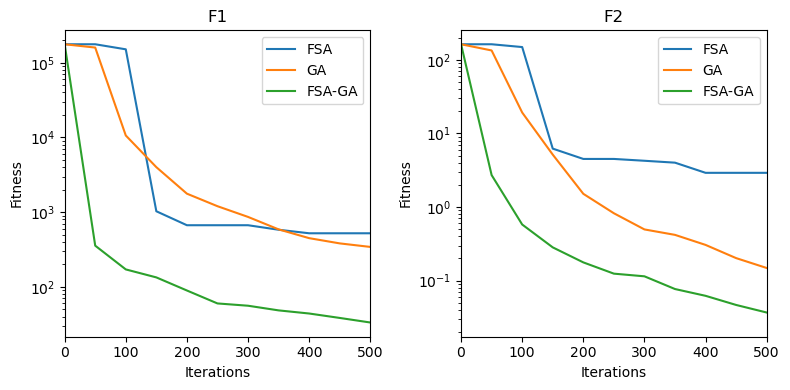

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def F1(x):
    sum=0
    for i in range(len(x)-1):
        sum+=100*pow((x[i+1]-x[i]*x[i]),2)+pow((x[i]-1),2)
    return sum

def F2(x):
    sum=0
    for i in range(len(x)):
        sum+=(x[i]+0.5)*(x[i]+0.5)
    return sum

# Flamingo Search Algorithm
def flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma):
    best_solution = initial_solution
    best_objective_value = objective_function(best_solution)
    convergence = [best_objective_value]

    for i in range(n_iter):
        flamingos = [best_solution + np.random.normal(scale=sigma, size=len(best_solution)) for _ in range(n_flamingos)]
        for f in flamingos:
            f_value = objective_function(f)
            if f_value < best_objective_value:
                best_solution = f
                best_objective_value = f_value
        if i % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence

# Genetic Algorithm Functions
def create_population(size, dim, lb=-5, ub=5):
    return np.random.uniform(lb, ub, (size, dim))

def fitness_function(population, objective_function):
    fitness = np.array([objective_function(ind) for ind in population])
    fitness_prob = 1 / (fitness + 1e-10)  # Inverse of objective value
    fitness_prob -= np.min(fitness_prob)  # Make sure all probabilities are non-negative
    fitness_prob /= np.sum(fitness_prob)  # Normalize to make sum of probabilities equal to 1
    return fitness_prob

def selection(population, fitness, num_parents):
    parents_idx = np.random.choice(len(population), size=num_parents, replace=False, p=fitness)
    return population[parents_idx]

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        crossover_point = np.random.randint(1, offspring_size[1] - 1)
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, mutation_rate=0.1):
    for idx in range(offspring_crossover.shape[0]):
        if np.random.rand() < mutation_rate:
            random_index = np.random.randint(0, offspring_crossover.shape[1])
            offspring_crossover[idx, random_index] += np.random.normal()
    return offspring_crossover

def genetic_algorithm(population, objective_function, generations, mutation_rate=0.1, elitism_rate=0.1):
    convergence = []
    best_objective_value = np.inf

    for gen in range(generations):
        fitness = fitness_function(population, objective_function)
        parents = selection(population, fitness, len(population) // 2)
        offspring_crossover = crossover(parents, (len(population) - len(parents), population.shape[1]))
        offspring_mutation = mutation(offspring_crossover, mutation_rate)
        population[:len(parents)] = parents
        population[len(parents):] = offspring_mutation

        # Elitism
        num_elites = int(elitism_rate * len(population))
        elites = population[np.argsort([objective_function(ind) for ind in population])[:num_elites]]
        population[:num_elites] = elites

        best_solution = population[np.argmin([objective_function(ind) for ind in population])]
        current_best_value = objective_function(best_solution)
        if current_best_value < best_objective_value:
            best_objective_value = current_best_value
        if gen % 50 == 0:
            convergence.append(best_objective_value)

    convergence.append(best_objective_value)  # Final value at iteration 100
    return best_solution, convergence

# Flamingo Search and Genetic Algorithm Combined
def flamingo_genetic_search(objective_function, initial_solution, n_iter, n_flamingos, sigma, generations, population_size):
    # Flamingo Search
    fs_best_solutions = [flamingo_search(objective_function, initial_solution, n_iter, n_flamingos, sigma)[0] for _ in range(10)]
    # Create population from best solutions found by FSA
    population = create_population(population_size, len(initial_solution))
    population[:10] = fs_best_solutions
    # Apply GA on initial population from FSA
    best_solution, convergence = genetic_algorithm(population, objective_function, generations)
    return best_solution, convergence

# Main Loop to Test All Functions
functions = [F1, F2]
function_names = ["F1", "F2"]

n_iter = 500  # Number of iterations for FSA
n_flamingos = 50  # Number of Flamingos
sigma = 0.5  # Step size in FSA
generations = 500  # Number of generations for GA
population_size = 100  # Population size for GA
dim = 30  # Dimension of the problem
lb = -5
ub = 5

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.ravel()

for i, (func, func_name) in enumerate(zip(functions, function_names)):
    # Step 0: Initial random solutions and select the best
    initial_population = create_population(10, dim)
    initial_objective_values = np.array([func(ind) for ind in initial_population])
    best_initial_index = np.argmin(initial_objective_values)
    initial_solution = initial_population[best_initial_index]
    initial_value = initial_objective_values[best_initial_index]

    time_start = time.time()

    # Flamingo Search
    fs_best_solution, fs_convergence = flamingo_search(func, initial_solution, n_iter, n_flamingos, sigma)
    fs_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    # Genetic Algorithm
    population = create_population(population_size, dim)
    population[0] = initial_solution  # Ensure starting from the same initial solution
    ga_best_solution, ga_convergence = genetic_algorithm(population, func, generations)
    ga_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    # Flamingo Search and Genetic Algorithm Mixed
    fsga_best_solution, fsga_convergence = flamingo_genetic_search(func, initial_solution, n_iter, n_flamingos, sigma, generations, population_size)
    fsga_convergence.insert(0, initial_value)  # Insert initial value at the beginning

    time_end = time.time()

    # Print Results
    print(f"Function: {func_name}")
    print("Execution Time:", time_end - time_start, "seconds")
    print("Flamingo Search Best Solution:", fs_best_solution, "Objective Value:", func(fs_best_solution))
    print("Genetic Algorithm Best Solution:", ga_best_solution, "Objective Value:", func(ga_best_solution))
    print("Flamingo Search and Genetic Algorithm Mixed Best Solution:", fsga_best_solution, "Objective Value:", func(fsga_best_solution))

    # Plot Convergence Comparison
    x_points = np.arange(0, len(fs_convergence) * 50, 50)  # Adjust x_points to match the interval

    # Check lengths of convergence arrays and adjust if necessary
    convergence_arrays = [fs_convergence, ga_convergence, fsga_convergence]
    min_length = min(map(len, convergence_arrays))
    convergence_arrays = [arr[:min_length] for arr in convergence_arrays]
    x_points = x_points[:min_length]

    axs[i].plot(x_points, convergence_arrays[0], label='FSA')
    axs[i].plot(x_points, convergence_arrays[1], label='GA')
    axs[i].plot(x_points, convergence_arrays[2], label='FSA-GA')
    axs[i].set_title(func_name)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Fitness')
    axs[i].set_yscale('log')  # Set logarithmic scale for y-axis
    axs[i].legend()
    axs[i].set_xlim(0, 500)


plt.tight_layout()
plt.show()
